In [88]:
import pandas as pd
import numpy as np

# Lab 4
## Question 1

Temperatures at the interfaces between sedimentary layers  of  different  rock  types  as  determined  from a  well  log  are  given  in the table below.  The  measured thermal  conductivity  of  each  layer  is  also  given. Determine the heat flow through each layer and the mean value of the heat flow.

|Depth(m) |Temp(C) |Rock Type | k|
|---   |---|---|---|
|380|18.362| | |
| | | Sandstone|3.2|
|402|18.871|||
|||Shale|1.7|
|412|19.330|||
|||Sandstone|5.3|
|465|20.446|||
|||Salt|6.1|
|475|20.580|||
|||Sandstone | 3.4|
|510|21.311|||
|||Shale|1.9|
|515|21.510|||


To calculate the heat flow for each slab we need to know the rate of temperature change with depth and it's thermal conductivity. Let's go a head and declare variables containing those values for each slab!

In [89]:
#The first layers values
k_1               = 3.2    #These are dummy values, change it to the actual values
change_in_depth_1 = 402-380
change_in_temp_1  = 18.871-18.362
rate_of_change_1  = change_in_temp_1/change_in_depth_1

#The second layers values
k_2               = 1.7
change_in_depth_2 = 412-402
change_in_temp_2  = 19.330 - 18.871
rate_of_change_2  = change_in_temp_2/change_in_depth_2

#The third layers values
k_3               = 5.3
change_in_depth_3 = 465 - 412
change_in_temp_3  = 20.446 - 19.330
rate_of_change_3  = change_in_temp_3/change_in_depth_3

#The fourth layers values
k_4               = 6.1
change_in_depth_4 = 475 - 465
change_in_temp_4  = 20.580 - 20.446
rate_of_change_4  = change_in_temp_4/change_in_depth_4

#The fifth layers values
k_5               = 3.4
change_in_depth_5 = 510 - 475
change_in_temp_5  = 21.311 - 20.580
rate_of_change_5  = change_in_temp_5/change_in_depth_5

#The sixth layers values
k_6               = 1.9
change_in_depth_6 = 515 - 510
change_in_temp_6  = 21.510 - 21.311
rate_of_change_6  = change_in_temp_6/change_in_depth_6


Excellent! Now that we have all of the values stored in variables, we will write a function which behaves in the same way as fouriers law of heat conduction. In other words it needs to multiply the negative of the thermal conductivity with the rate of temperature change versus depth.

### Fourier's law of heat conduction
$ q = -k \frac{\partial T}{\partial y}$ or in terms of our declared variables

$\text{Heat flow}=-k*\text{rate_of_change}$

In [90]:
def heat_conduction(thermal_conductivity, rate):
    # print(-1*thermal_conductivity*rate) #literally doing exactly what the equation above is doing
    return -(thermal_conductivity * rate)


Don't worry too much about what is happening in the above cell. The important thing is that we use the above function by writing out the function name, and then putting in our variable names for thermal condictivity and rate of change in parenthesis. Below is an example of how to call the function using our variables for layer 1:

In [91]:
heat_conduction(k_1,rate_of_change_1)


-0.07403636363636369

Use the code block below to calculate the values for the different layers


In [92]:
conds = np.zeros(6)

conds[0] = heat_conduction(k_1, rate_of_change_1)
conds[1] = heat_conduction(k_2, rate_of_change_2)
conds[2] = heat_conduction(k_3, rate_of_change_3)
conds[3] = heat_conduction(k_4, rate_of_change_4)
conds[4] = heat_conduction(k_5, rate_of_change_5)
conds[5] = heat_conduction(k_6, rate_of_change_6)

np.mean(conds)

-0.08200629870129855

#### Record all of your values for the different layers here and calculate the average heatflow:

#### q_layer 1 = -0.074

#### q_layer 2 = -0.078

#### q_layer 3 = -0.112

#### q_layer 4 = -0.082

#### q_layer 5 = -0.071

#### q_layer 6 = -0.076

#### q average = -0.082




## Question 2
#### The table below gives  a  series  of  surface  heat  flow  and heat production measurements in the Sierra Nevada Mountains  in  California.  Determine  the  reduced heat  flow $q_m$ and  the  scale  depth $h_r$

|heat flow ($q_\circ$)| heat production ($\rho H_\circ$)|
|---|---|
|18|0.3|
|25|0.8|
|25|0.9|
|29|1.3|
|31|1.5|
|34|2.0|
|42|2.6|
|54|3.7|

We solved question one by describing heatflow with conduction. However, heat flow through the earth also has a radiogenic component. Equation 4.28 in the book captures both these components $q = -q_m - h_r \rho H_\circ e ^\frac{-y}{h_r}$, where $q_m$ is the reduced heat flow and $h_r$ is the scale depth.

Notice that our question is giving  values at the surface(y=0) so this equation simplifies to $q_\circ = h_r \rho H_\circ + q_m$. This equation looks very similar to an equation for a line $y = mx +b $ If we treat the heat production ($\rho H_\circ$) as our x-points and the heat flow ($q_\circ$) as our y-points, then what part of our new heat flow equation is slope "m" and what part is the y intercept "b" ?



#### The slope is :

#### The y intercept is :


Now if we plot our ("x","y") points and trace a line through it, the slope and y intercept of that line will gives us our final answer!

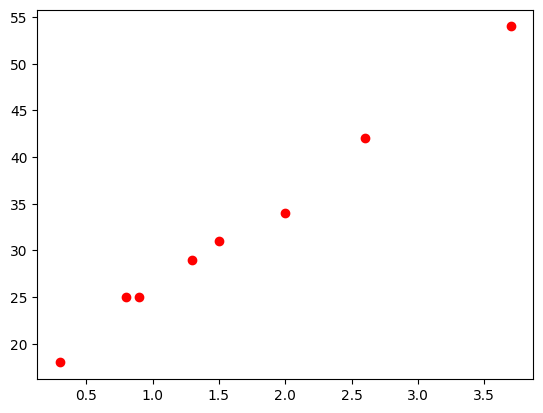

In [93]:
import matplotlib.pyplot as plt #we want to import some new tools to use
import numpy as np

"""
The variable x is going to hold all of our x-coordinate points. I started filling them in, fill in the rest!
as an example it should look like the this when its done (with different values)

x = np.array([0.3,0.8,1.2,2.4,6.8,2.77,1.5])

"""
x = np.array([0.3,0.8, 0.9, 1.3, 1.5, 2.0, 2.6, 3.7])

#same thing but for y-values now

y = np.array([18,25, 25, 29, 31, 34, 42, 54])

plt.plot(x,y,'ro'); #This actually plots the points!


If your points look like they fall in a straight(ish) line, then you're on the correct track and now all we need to do is a fit a line to our points and read off our slope and y intercept values:


slope (m) is 
10.216718266253872
y-intercept (b) is
15.520123839009294


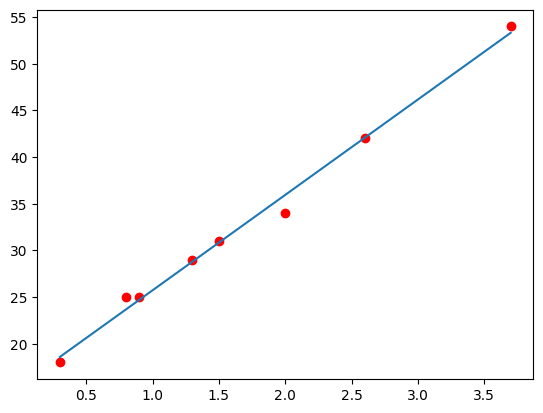

In [94]:
"""
You don't have to change any code here. This is finding the line that best fits the data above
and is going to print out its slobe and y intercept!
"""

m, b = np.polyfit(x,y,1) #linear fit


print("slope (m) is ")
print(m)
print("y-intercept (b) is")
print(b)

#Here we plot the line over our points from the previous plot
plt.plot(x,y,'ro')
plt.plot(x, m*x + b);

If you have a line that passes through or near your points you did a good job! Now we can finally answer the question, as long as you remember what the slope and y-intercepts are supposed to represent:

#### reduced flow is : 15.52

#### scale depth is  : 10.22
    
    

## Heat flow in our backyard


Now let's look at some actual data from the Oregon Cascades!  Running the code below will plot the location of several geothermal test wells on a map of topographic elevation.  Notice the stark transition in the appearance of the landscape as you move from west to east.  Most of the region between Eugene and the main line of volcanos is heavily dissected by rivers, resulting in steep terrain dominated by ridges and valleys.  This region is often called the "Western Cascades".  Near the main line of volcanos - in a region known as the "High Cascades", the terrain is much smoother and there are very few rivers or other signs of erosion by water.  This is because the young basalts erupted by recently active volcanos has very high permeability, and nearly all of the water that falls on the surface flows directly into bedrock aquifers.  As basalt ages the permeability decreases through chemical weathering processes, eventually keeping enough water on the surface that fluvial channels start to form.  In fact the increase in fluvial channels moving west from the High Cascades corresponds with a sharp increase in bedrock age, and thus a decrease in groundwater.  In this next section we will look at how this shift in permeability affects heat flow in the Oregon Cascades.

(-0.5, 639.5, 354.5, -0.5)

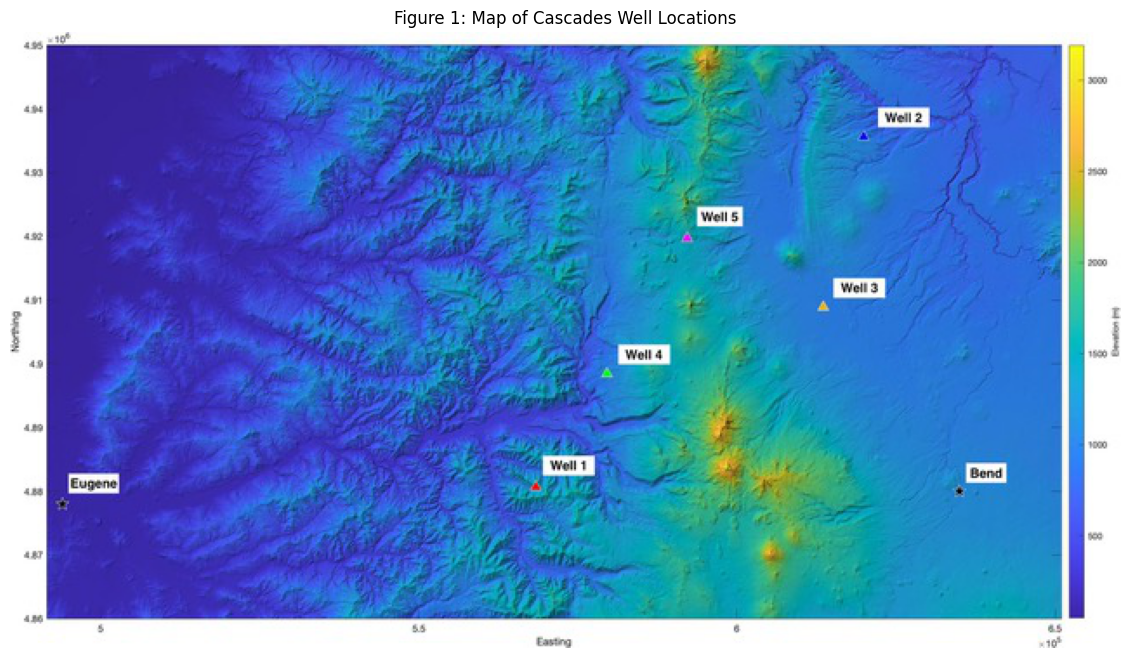

In [95]:
import matplotlib.pyplot as plt
map=plt.imread("images/Well_Map.jpeg")
#LET US SEE THE SHAPE OF THE IMAGE.
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(map)
ax.set_title('Figure 1: Map of Cascades Well Locations')
plt.axis('off')

The following block of code imports and plots two geothermal profiles, one from the Western Cascades (Well 1), and one from a fairly young basalt surface east of the main line of volcanos (Well 2). You will then be asked to make calculations based on plotted values.  To get more precise measurements it may be useful to "zoom in" on the graphs.  This can be done by changing the x and y limits in the block of code below using the plt.xlim and plt.ylim functions.



(-0.16, -0.003529411764705882)

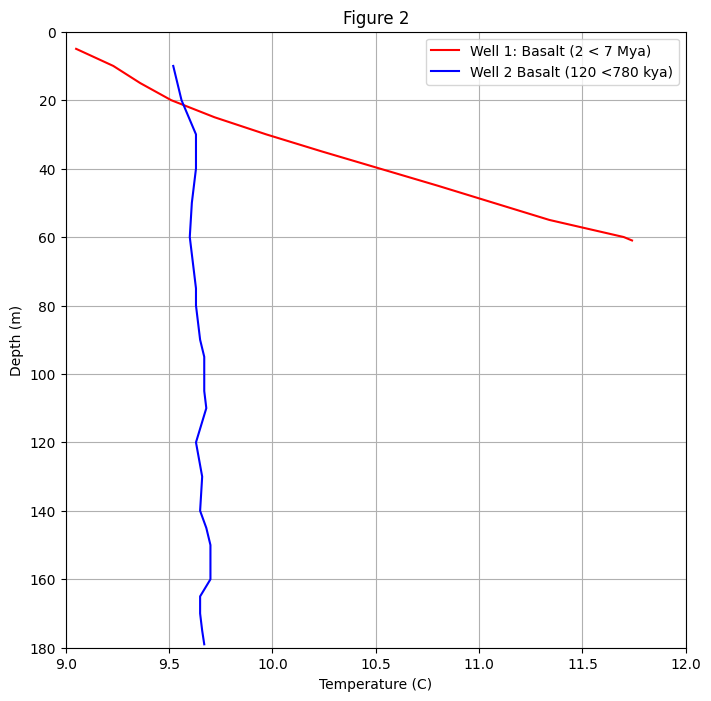

In [96]:
import pandas as pd

# Import Well Profile Data
Well_Profiles = pd.read_csv ('data/Well_Profiles.csv')
W1_Depth=Well_Profiles.iloc[:,0]
W1_Temp=Well_Profiles.iloc[:,1]
W2_Depth=Well_Profiles.iloc[:,2]
W2_Temp=Well_Profiles.iloc[:,3]
W3_Depth=Well_Profiles.iloc[:,4]
W3_Temp=Well_Profiles.iloc[:,5]
W4_Depth=Well_Profiles.iloc[:,6]
W4_Temp=Well_Profiles.iloc[:,7]
W5_Depth=Well_Profiles.iloc[:,8]
W5_Temp=Well_Profiles.iloc[:,9]

# Plot wells 1 and 2
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(W1_Temp,W1_Depth,color="red",label="Well 1: Basalt (2 < 7 Mya)")
ax.plot(W2_Temp,W2_Depth,color="blue",label="Well 2 Basalt (120 <780 kya)")
ax.legend(loc=0)
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth (m)')
ax.set_title('Figure 2')
plt.grid()

plt.xlim([9, 12])  # Changing values within the brackets will change the x limits of the plot
plt.ylim([0,180])  # Changing values within the brackets will change the y limits of the plot

plt.gca().invert_yaxis()


k_basalt = 4.0
roc_W1 = 1/25
roc_W2 = .15/170

flux_w1 = heat_conduction(k_basalt, roc_W1)
flux_w2 = heat_conduction(k_basalt, roc_W2)

flux_w1, flux_w2

### Question 3
#### Use Fouriers law of heat conduction to calculate heat flux for each of the geothermal profiles plotted in Figure 2.  What might explain the difference in these two temperature profiles?  Can Fouriers law describe the physics of heat transfer in both cases?  Why or why not?  

Heat Flux for Well 1: -0.16
Heat Flux for Well 2: -0.0035

This is likely affected by the difference in permeability between the newer basalt and older basalt. One possible explanation is that when the permeability is higher, water can more easily spread heat out across all depths, leading to a more uniform heat profile. It seems that Fourier's Law might not be a good way to describe well 2 because the temperature is essentially uniform at all depths.

Now let's look at a few more complicated profiles.  Each of these well logs shows dramatic changes in the pattern of heat flux along the profile.  

## Question 4

#### a) Identify major transitions between modes of heat transfer in each profile, and plot the depths of these transitions by modifying the code below.  

This will be done by entering the depth of a transition into the brackets in each line with Well_X_Trans=[].  If you think there are multiple transitions in a single profile enter them all into the same brackets seperated by commas.  For example, if I thought profile X had a transition at 100 and 320 meters the code would read Well_X_Trans=[100,320]

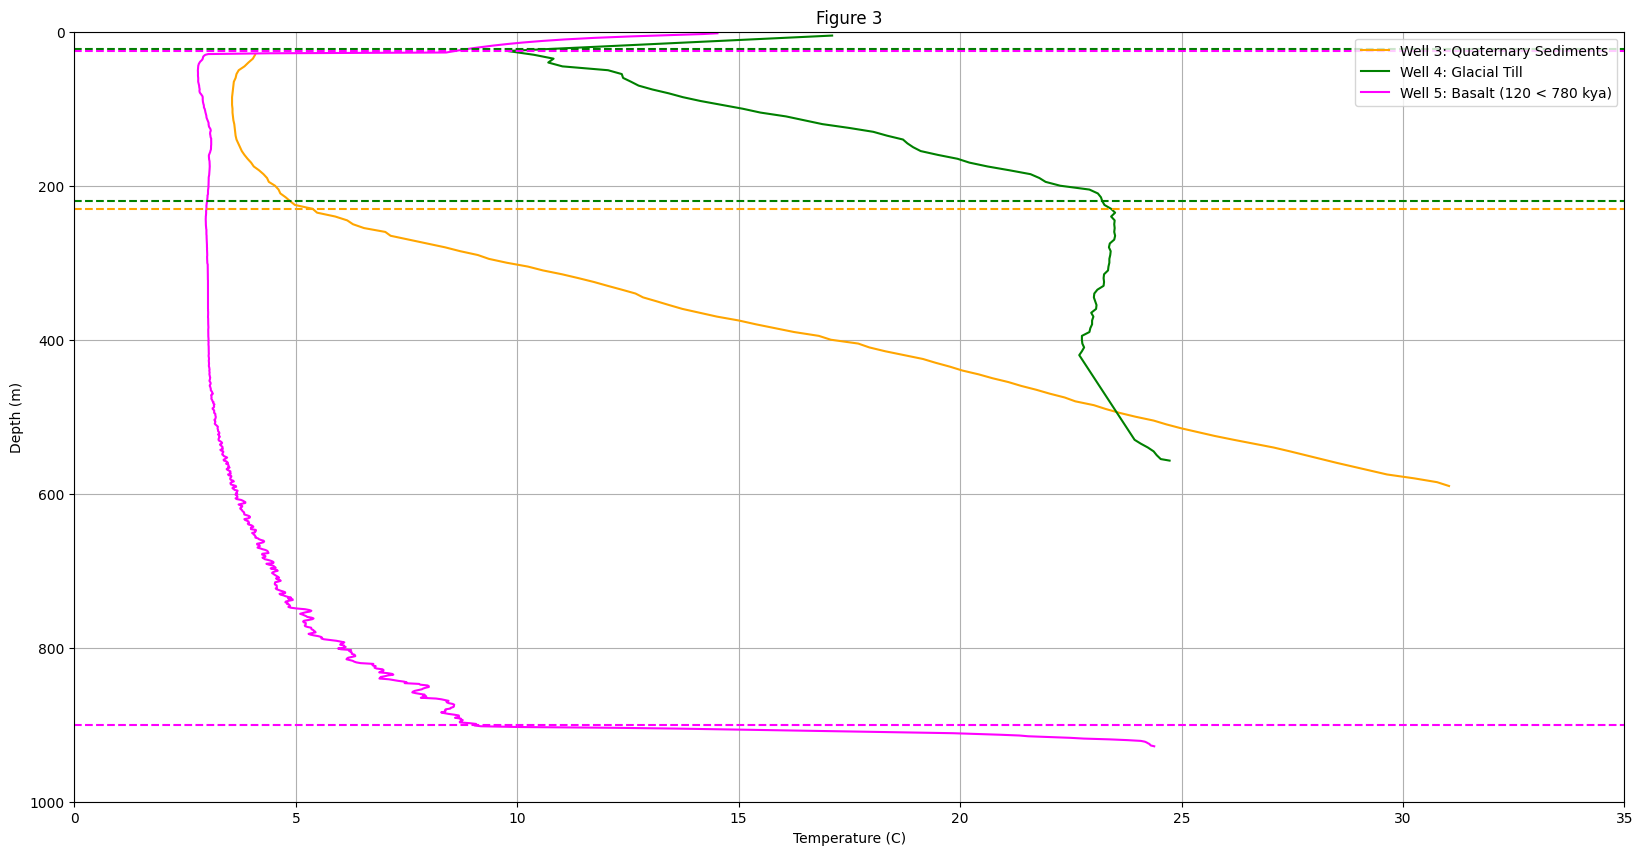

In [102]:
  # Plot the depths of heat flow transitions in wells 3 and 4 by entering depth values into the brackets
# in the next two lines of code.  If you identify more than one transition you can enter multiple values
# seperated by commas (ie. Well_X_Trans=[depth1,depth2,depth3,...,depthN]).

Well_3_Trans=[230] # Depths of heat flow transitions for Well 3
Well_4_Trans=[22, 220] # Depths of heat flow transitions for Well 4
Well_5_Trans=[25, 900] # Depths of heat flow transitions for Well 5


# Plot temperature profiles for wells 3 and 4
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(W3_Temp,W3_Depth,color="orange",label="Well 3: Quaternary Sediments")
ax.plot(W4_Temp,W4_Depth,color="green",label="Well 4: Glacial Till")
ax.plot(W5_Temp,W5_Depth,color="magenta",label="Well 5: Basalt (120 < 780 kya)")
ax.legend(loc=0)
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth (m)')
ax.set_title('Figure 3')
plt.grid()
plt.xlim([0,35])
plt.ylim([0,1000])
plt.gca().invert_yaxis()
plt.hlines(y = Well_3_Trans, xmin = 0, xmax = 35,colors = 'orange',  linestyle='dashed')
plt.hlines(y = Well_4_Trans, xmin = 0, xmax = 35,colors = 'green',  linestyle='dashed')
plt.hlines(y = Well_5_Trans, xmin = 0, xmax = 35,colors = 'magenta',  linestyle='dashed')
plt.savefig('Well_Profiles_Lab4.png')


#### b) For each profile in Figure 3 offer a potential explanation for each transition identified in part a.  These can be brief, but should take into account what we know about geology in the Oregon Cascades.

Well 3: Before the transition, the temperature changed a relatively small amount with depth, while after the transition the temperature began to rapidly increase with depth. This could be because the first 200 or so meters are looser sediment with higher permeability, creating a more even temperature profile.

Well 4: The profile of well 4 begins with a sharp decrease in temperature from about 0-20 meters, then a rapid increase from ~20-220 m. After 220 m, the temperature is mostly even. This could indicate that there are layers of varying temperature, permeability, and age. For example, the top 20 m might be cold glacial till, and from 20-220 m it could be older basalt, with younger basalt being found deeper.

Well 5: The first transition is likely caused by a change from a cold top layer to the younger, high permeability basalt leading to a flat temperature profile. The second transition could be caused by an increase in the temperature of the groundwater moving through the basalt.